<a href="https://colab.research.google.com/github/AlisaEee/DataBase_iu9/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22hw_1_game_of_thrones_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

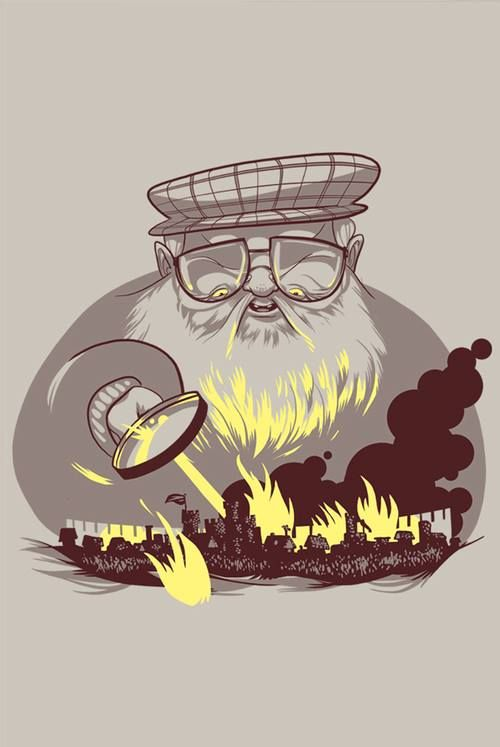

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [53]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 50.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 100MB/s]


Перемещаем на диск

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: 

In [ ]:
!cp /content/game_of_thrones_test.csv /content/drive/MyDrive

In [ ]:
!cp /content/game_of_thrones_train.csv /content/drive/MyDrive

**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [55]:
data = pd.read_csv("/content/drive/MyDrive/game_of_thrones_train.csv",index_col="S.No")

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [56]:
features = data.columns

In [57]:
data.head(3)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

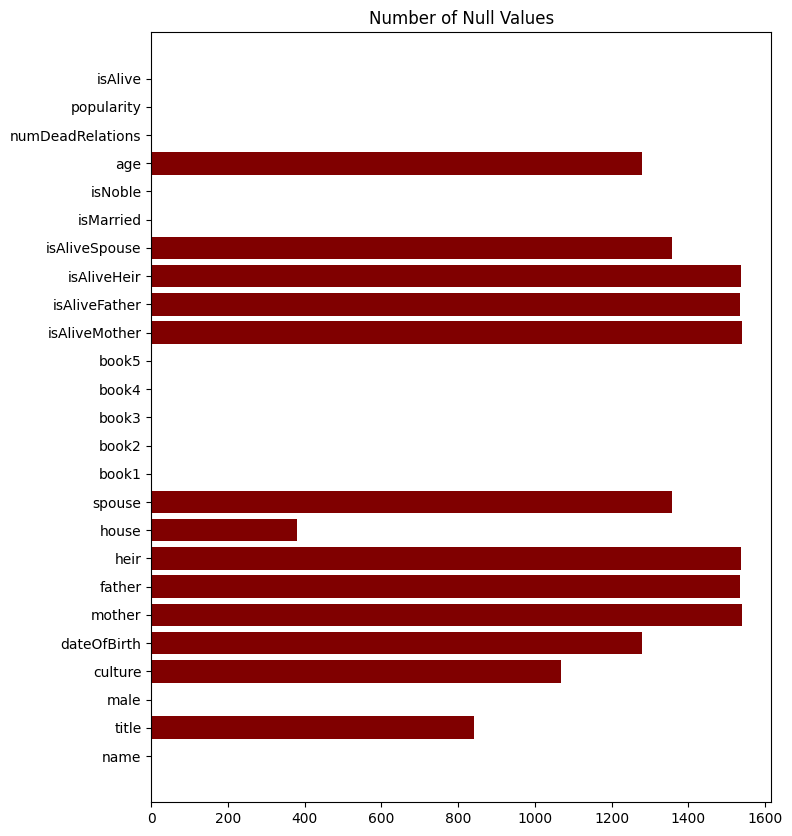

In [ ]:
fig = plt.figure(figsize=(8, 10))

# creating the bar plot
plt.barh(features,  data.isna().sum(axis=0), color='maroon')

plt.title("Number of Null Values")
plt.show()

Посмотрим распределение признаков, чтобы можно было принять решение о замене пустых значений.

Оценим каждый признак по отдельности:

In [ ]:
features

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
       'isAlive'],
      dtype='object')

### 1. Title - знатность

In [59]:
data["title"].dropna().sample(3)

,title
S.No,
389,Ser
1090,Goldgrass
937,Goldengrove


In [60]:
data["title"].value_counts()

,count
title,
Ser,306
Maester,29
Archmaester,21
Lord,19
Septon,16
...,...
Sweetport Sound,1
Lord of Greyshield,1
Felwood,1


Люди не имеющие титула могут не иметь его вовсе, либо пропуск является ошибкой. Отметим NaN за Ser - предполагаем, что это наимньший из титулов

In [61]:
data["title"].isna().sum()

840

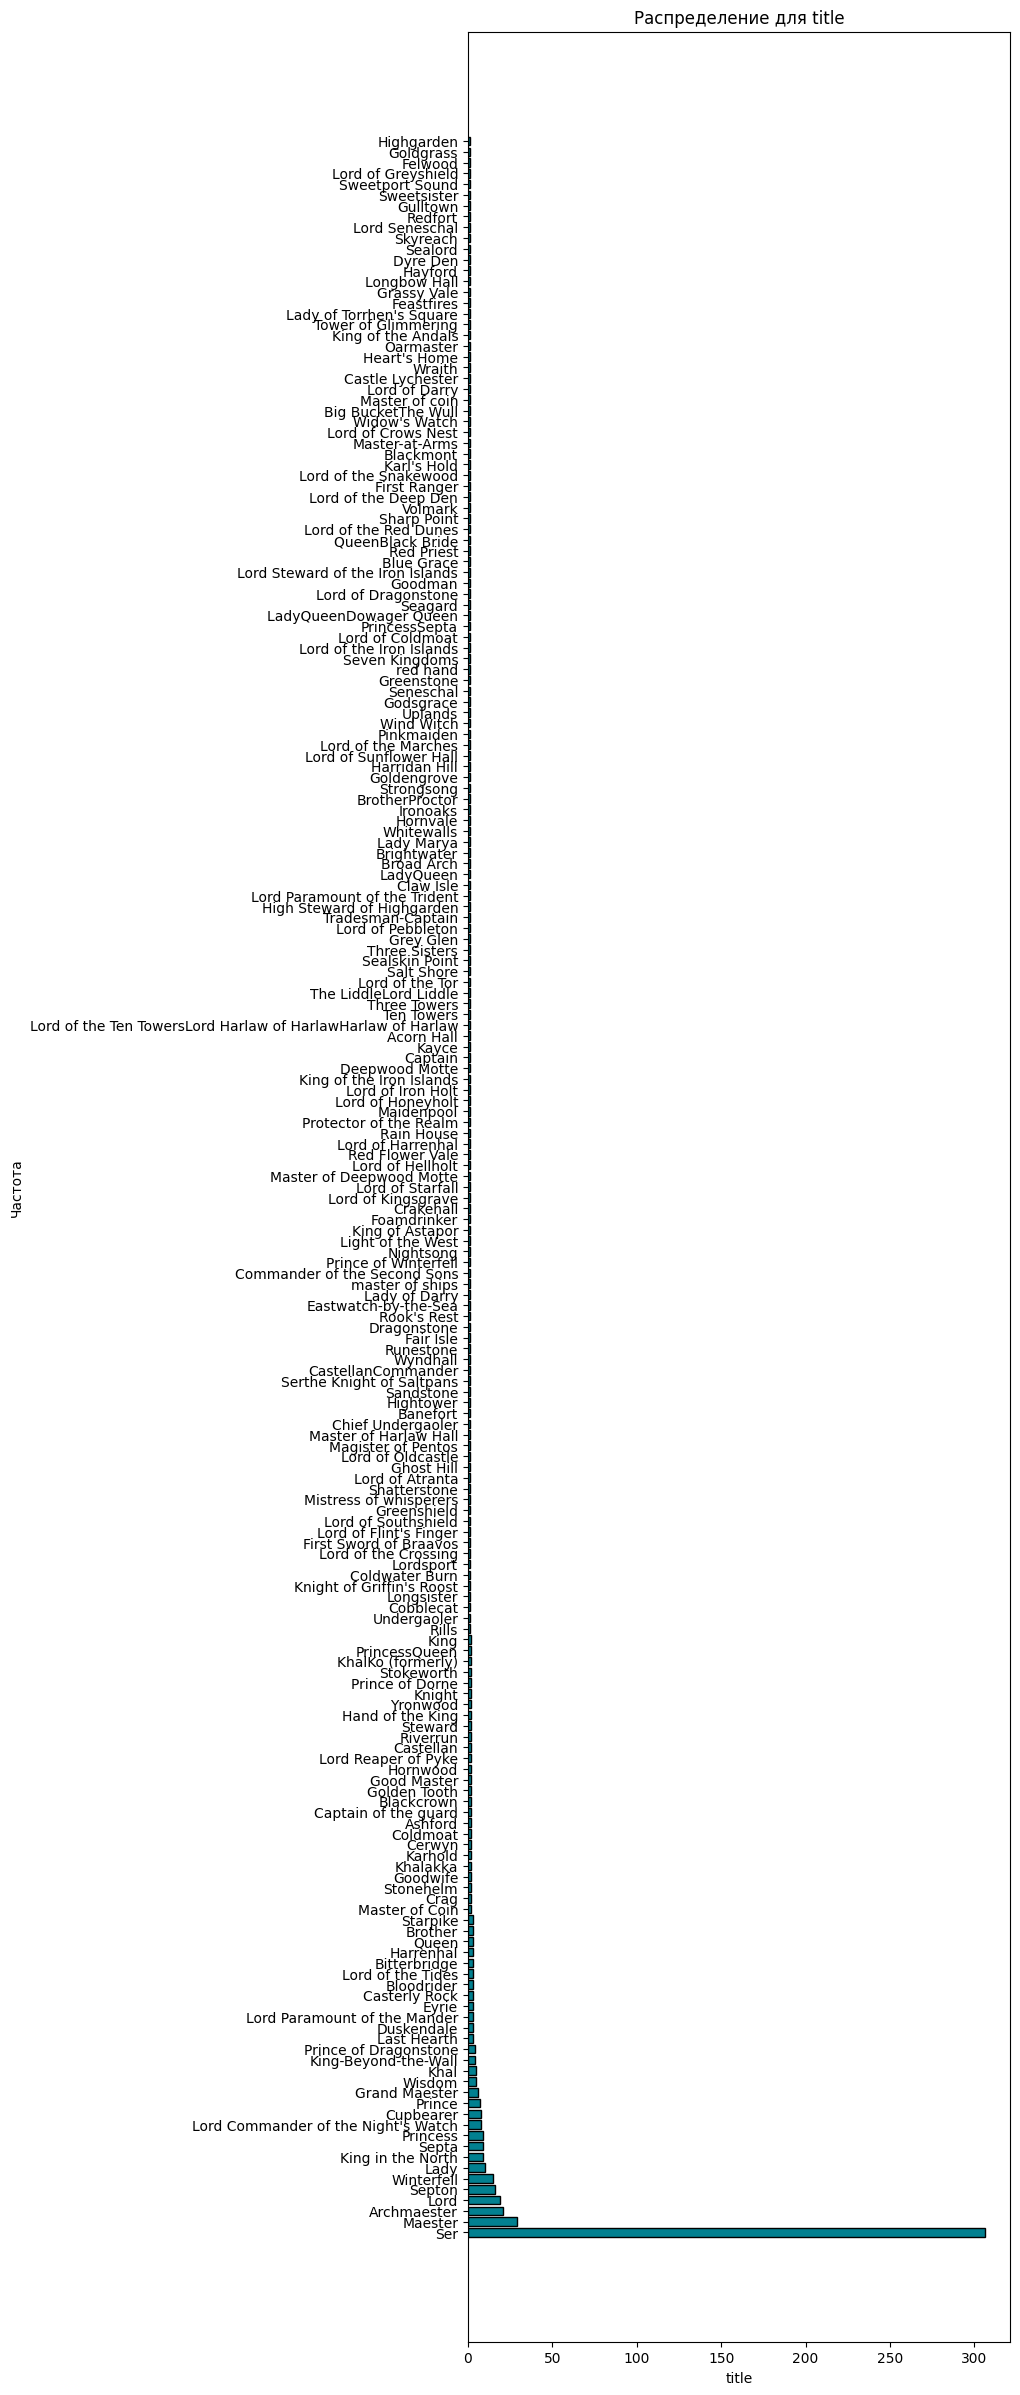

In [62]:
fig = plt.figure(figsize=(7,30))
feature_data = data["title"].dropna()
plt.barh(feature_data.value_counts().index,feature_data.value_counts().values, edgecolor='black',color="#028090")
plt.title(f'Распределение для title')
plt.xlabel("title")
plt.ylabel('Частота')
plt.show()

In [63]:
mode_title = data["title"].dropna().mode()
mode_title

,title
0,Ser


In [64]:
data["title"].fillna(data["title"].mode()[0], inplace=True)

<ipython-input-64-b09196825d02>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["title"].fillna(data["title"].mode()[0], inplace=True)


### 2. Male - пол

Все значения непусты

### 3. Culture - социальная группа

In [65]:
data["culture"].isna().sum() # a lot of nuls

1069

Категориальный признак - посмотрим моду

In [66]:
mode_culture = data["culture"].dropna().mode()
mode_culture

,culture
0,Northmen


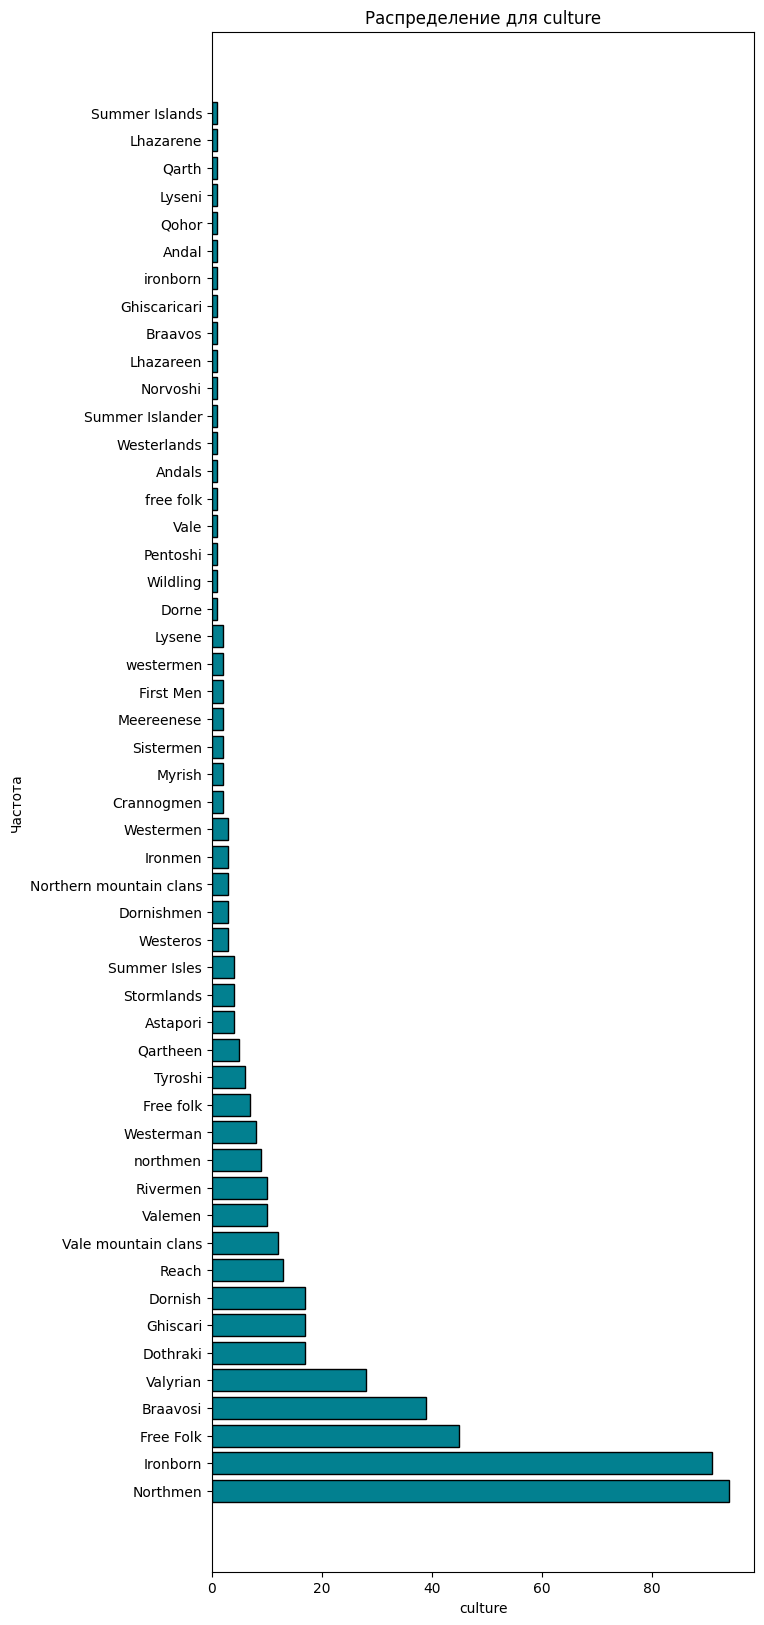

In [67]:
fig = plt.figure(figsize=(7,20))
feature_data = data["culture"].dropna()
plt.barh(feature_data.value_counts().index,feature_data.value_counts().values, edgecolor='black',color="#028090")
plt.title(f'Распределение для culture')
plt.xlabel("culture")
plt.ylabel('Частота')
plt.show()

In [68]:
data["culture"].fillna(data["culture"].mode()[0], inplace=True)

<ipython-input-68-bbbed15fb85d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["culture"].fillna(data["culture"].mode()[0], inplace=True)


In [69]:
data["culture"].isna().sum() # no more nuls

0

Нужно посмотреть насколько он нужен

### 4. DateofBirth

Признак удалить

### 5. Mother, heir,father, isAliveMother Father Heir, Spounce

Слишком много пропусков, признаки бесполезны

### 6. House - дом, к которому принадлежит герой

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             1557 non-null   object 
 2   male              1557 non-null   int64  
 3   culture           1557 non-null   object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

In [70]:
data["house"].value_counts()

,count
house,
House Frey,89
Night's Watch,88
House Stark,56
House Targaryen,40
House Lannister,36
...,...
House Celtigar,1
House of Ghazeen,1
House Byrch,1


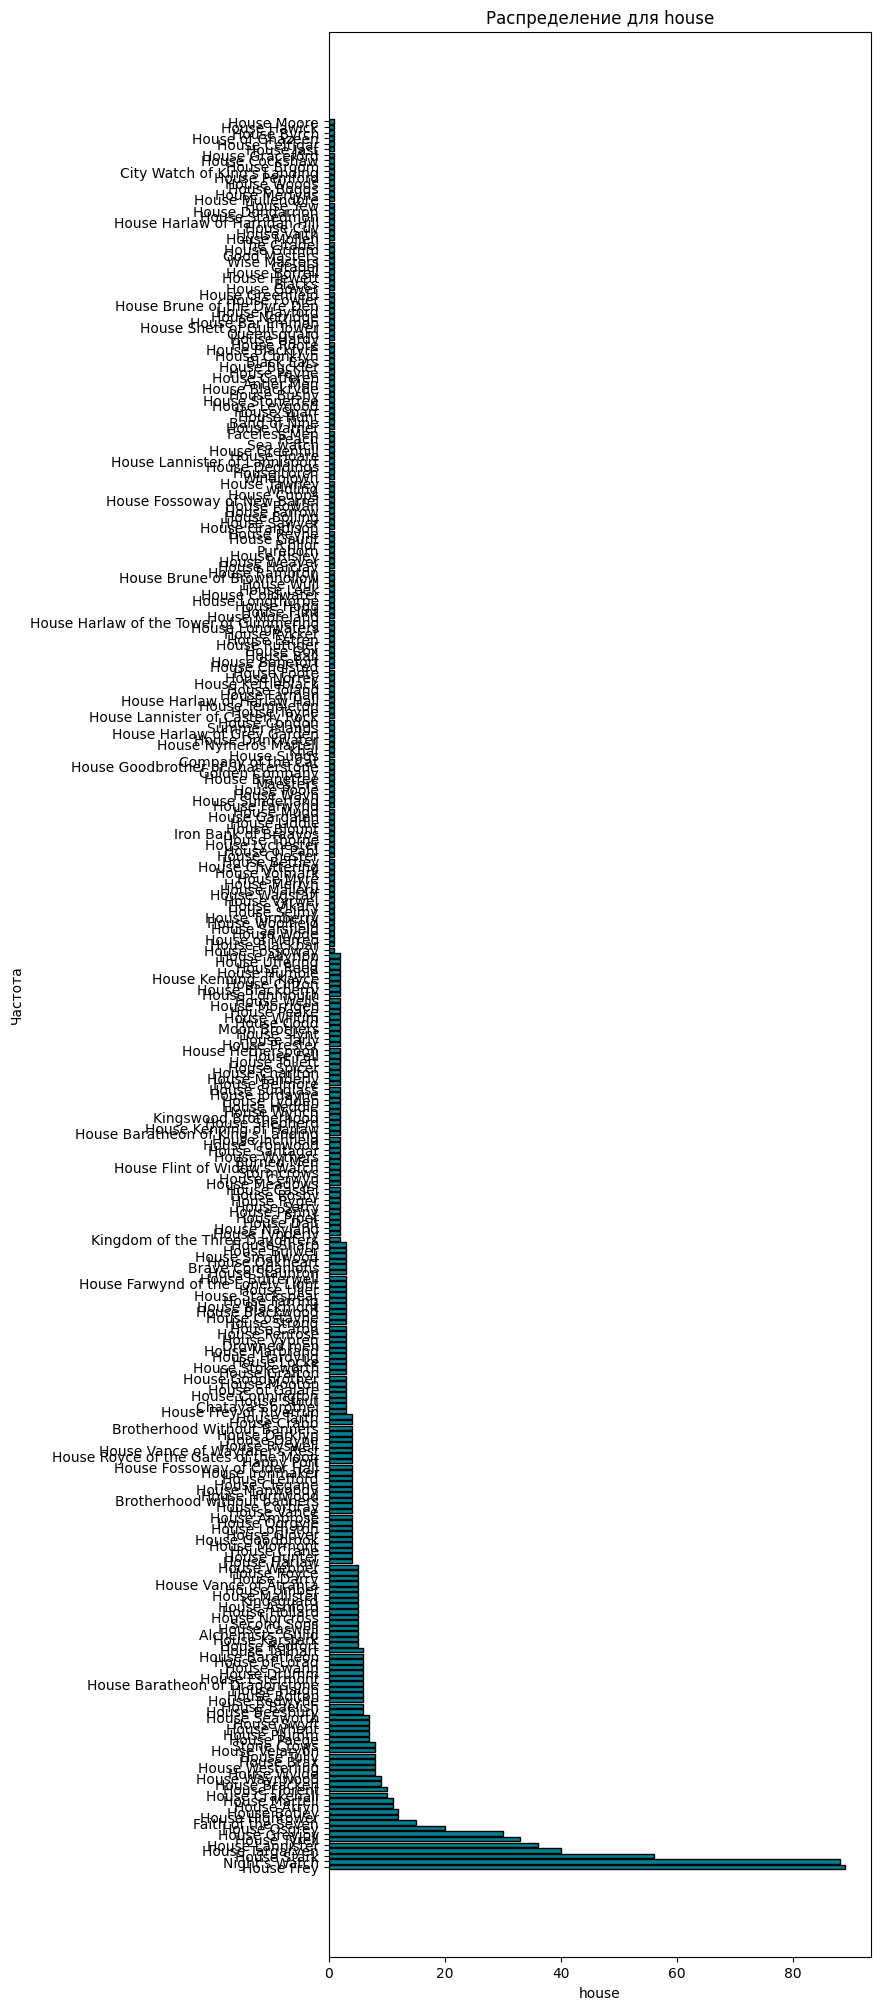

In [14]:
fig = plt.figure(figsize=(7,25))
feature_data = data["house"].dropna()
plt.barh(feature_data.value_counts().index,feature_data.value_counts().values, edgecolor='black',color="#028090")
plt.title(f'Распределение для house')
plt.xlabel("house")
plt.ylabel('Частота')
plt.show()

Нет нужды хранить дома, которые встречаются один раз. Мы их замепняем на other

In [71]:
house_counts = data["house"].value_counts()
filtered_houses = house_counts[house_counts > 1].index

# Оставляем только те строки, где значение в "house" встречается более одного раза
data = data[data["house"].isin(filtered_houses)]

# Выводим отфильтрованный DataFrame
print(data.value_counts())

Series([], Name: count, dtype: int64)


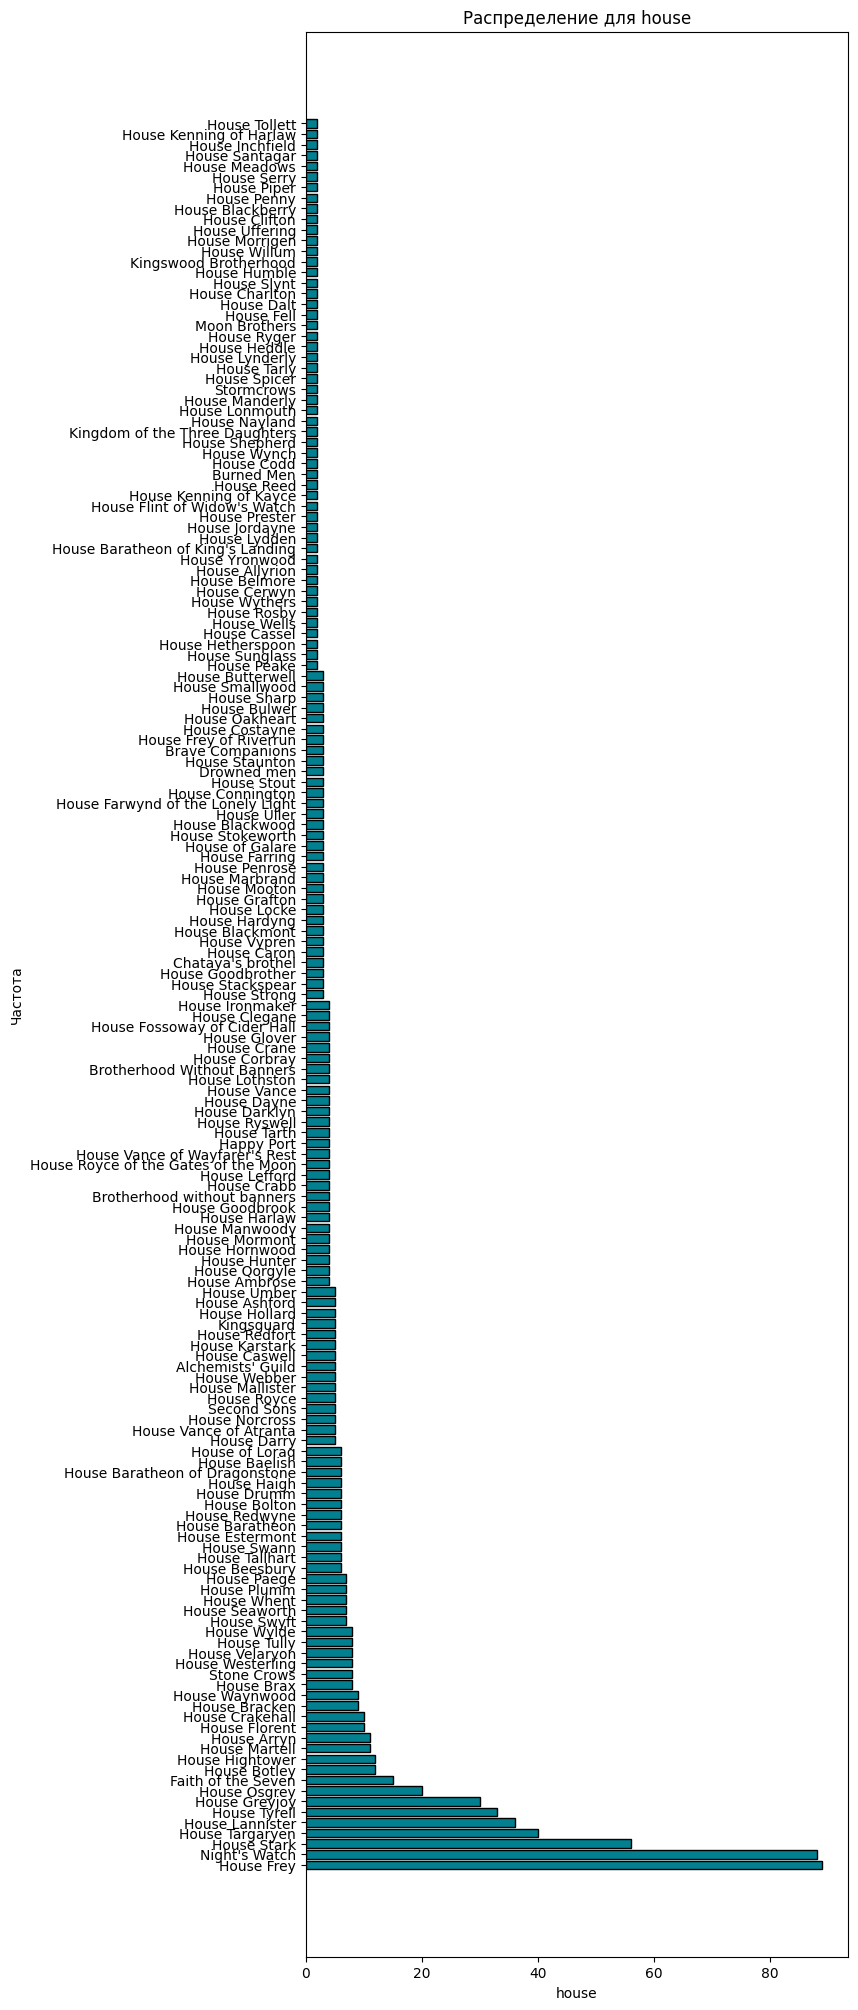

In [17]:
fig = plt.figure(figsize=(7,25))
feature_data = data["house"].dropna()
plt.barh(feature_data.value_counts().index,feature_data.value_counts().values, edgecolor='black',color="#028090")
plt.title(f'Распределение для house')
plt.xlabel("house")
plt.ylabel('Частота')
plt.show()

In [72]:
data["house"].fillna(data["house"].mode()[0], inplace=True)

<ipython-input-72-154fba54a0fa>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["house"].fillna(data["house"].mode()[0], inplace=True)


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1026 entries, 2 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1026 non-null   object 
 1   title             1026 non-null   object 
 2   male              1026 non-null   int64  
 3   culture           1026 non-null   object 
 4   dateOfBirth       241 non-null    float64
 5   mother            0 non-null      object 
 6   father            0 non-null      object 
 7   heir              0 non-null      object 
 8   house             1026 non-null   object 
 9   spouse            174 non-null    object 
 10  book1             1026 non-null   int64  
 11  book2             1026 non-null   int64  
 12  book3             1026 non-null   int64  
 13  book4             1026 non-null   int64  
 14  book5             1026 non-null   int64  
 15  isAliveMother     0 non-null      float64
 16  isAliveFather     0 non-null      float64
 17  

### 7. AGE - возраст

In [74]:
data["age"].isna().sum()

785

In [75]:
data.describe()['age']

,age
count,241.000000
mean,34.236515
std,25.630997
min,0.000000
25%,16.000000
50%,24.000000
75%,46.000000
max,100.000000


In [76]:
mean_age = data["age"].dropna().mean()
mode_age = data["age"].dropna().mode()
median_age = data["age"].dropna().median()

In [77]:
median_age

24.0

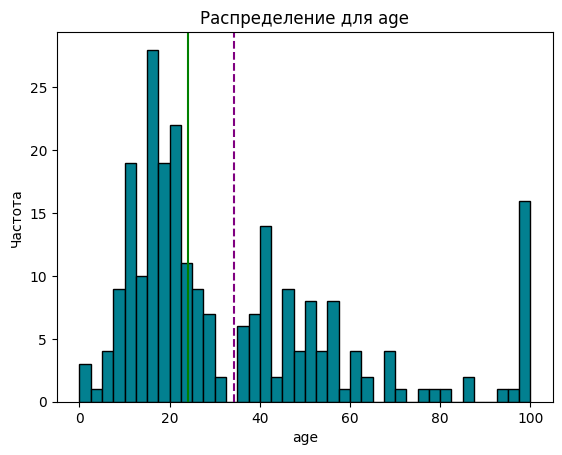

In [78]:
feature_data = data["age"].dropna()
plt.hist(feature_data, bins=40, edgecolor='black',color="#028090")
plt.title(f'Распределение для age')
plt.xlabel("age")
plt.ylabel('Частота')
plt.axvline(x=mean_age, color='purple', linestyle='--')
plt.axvline(x=median_age, color='green', linestyle='-')
plt.show()

In [79]:
data["age"].fillna(int(median_age), inplace=True)

<ipython-input-79-fe4e88da0a84>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["age"].fillna(int(median_age), inplace=True)


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


### 1. Name

Name сам по себе не представляет ценности, однако из него можно получить некоторую информацию.

In [80]:
data["name"].value_counts() # 1557 unique => no same name

,count
name,
Walder Frey,1
Marwyn Belmore,1
Hullen,1
Humfrey Beesbury,1
Humfrey Hardyng,1
...,...
Jaehaerys Targaryen (son of Aegon II),1
Jaehaera Targaryen,1
Jaggot,1


Имена содержат лишнюю информацию. Удаляем

In [81]:
import re
# Функция для удаления текста в скобках
def remove_parentheses(text):
    return re.sub(r'\s*\(.*?\)\s*', ' ', text).strip()

# Применяем функцию к столбцу full_name
data['name'] = data['name'].apply(remove_parentheses)

In [82]:
data.loc[730,"name"] # check function work

'Luthor Tyrell'

Можем предположить, что нам не  требуется столбец с именем, но может помочь столбец с фамилией (возможно с именем).
Попробуем создать два новых признака: firstname/lastname

In [83]:
# Функция для разделения имени и фамилии
def split_name(name):
    parts = name.rsplit(' ', 1)  # Разделяем только по последнему пробелу
    if len(parts) == 2:
        first_part = parts[0]   # Все, что до последнего пробела
        last_part = parts[1]     # Все, что после последнего пробела
    else:
        first_part = name        # Если пробелов нет, сохраняем целиком
        last_part = ""

    return pd.Series([first_part, last_part])

# Применяем функцию к столбцу full_name
data[['firstname', 'lastname']] = data['name'].apply(split_name)

In [84]:
data["firstname"].value_counts()

,count
firstname,
Jeyne,11
Jon,11
Walder,9
Robert,7
Alyn,7
...,...
Luke of,1
Lum,1
Luton,1


In [85]:
firstname_counts = data["firstname"].value_counts()

In [86]:
filtered_firstname_counts = firstname_counts[firstname_counts > 1]

# Выводим отфильтрованные значения
print(filtered_firstname_counts)

firstname
Jeyne      11
Jon        11
Walder      9
Robert      7
Alyn        7
           ..
Quenton     2
Rhaena      2
Tim         2
Rolland     2
Symond      2
Name: count, Length: 127, dtype: int64


In [87]:
data["lastname"].value_counts()

,count
lastname,
,258
Frey,83
Targaryen,30
Tyrell,27
Stark,26
...,...
Stripeback,1
Maidenpool,1
Boot,1


In [88]:
lastname_counts = data["lastname"].value_counts()

In [89]:
filtered_lastname_counts = lastname_counts[lastname_counts > 1]

# Выводим отфильтрованные значения
print(filtered_lastname_counts)

lastname
              258
Frey           83
Targaryen      30
Tyrell         27
Stark          26
             ... 
Storm           2
Penny           2
Uffering        2
Clifton         2
Blackberry      2
Name: count, Length: 144, dtype: int64


Можем удалить непопулярные имена. Заменим на other



In [91]:
mask = data["firstname"].isin(firstname_counts[firstname_counts > 1].index)

# Заменяем значения, которые не удовлетворяют маске, на 'other'
data["firstname"] = data["firstname"].where(mask, "other")

In [90]:
mask = data["lastname"].isin(lastname_counts[lastname_counts > 1].index)

# Заменяем значения, которые не удовлетворяют маске, на 'other'
data["lastname"] = data["lastname"].where(mask, "other")

In [92]:
data["firstname"].value_counts()

,count
firstname,
other,659
Jon,11
Jeyne,11
Walder,9
Walda,7
...,...
Jeffory,2
Rupert,2
Samwell,2


In [93]:
data["lastname"].value_counts()

,count
lastname,
,258
Frey,83
other,57
Targaryen,30
Tyrell,27
...,...
Connington,2
Lynderly,2
Belmore,2


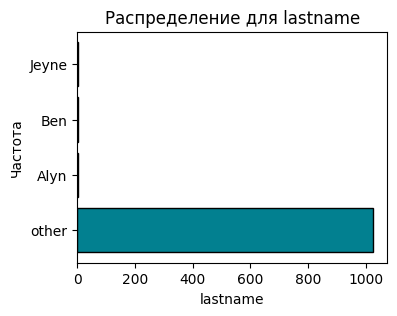

In [43]:
fig = plt.figure(figsize=(4,3))
feature_data = data["lastname"].dropna()
plt.barh(feature_data.value_counts().index,feature_data.value_counts().values, edgecolor='black',color="#028090")
plt.title(f'Распределение для lastname')
plt.xlabel("lastname")
plt.ylabel('Частота')
plt.show()

In [44]:
data["lastname"].value_counts()

,count
lastname,
other,1023
Alyn,1
Ben,1
Jeyne,1


In [94]:
data["isPopular"] = data['popularity'].apply(lambda x: 1 if x >= 0.5 else 0)

In [95]:
data["boolDeadRelations"] = data['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)

In [96]:
data["culture"].dropna().value_counts()

,count
culture,
Northmen,823
Ironborn,61
Valyrian,26
Dornish,12
Vale mountain clans,12
Reach,11
Rivermen,9
Valemen,9
northmen,9


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1026 entries, 2 to 1557
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1026 non-null   object 
 1   title              1026 non-null   object 
 2   male               1026 non-null   int64  
 3   culture            1026 non-null   object 
 4   dateOfBirth        241 non-null    float64
 5   mother             0 non-null      object 
 6   father             0 non-null      object 
 7   heir               0 non-null      object 
 8   house              1026 non-null   object 
 9   spouse             174 non-null    object 
 10  book1              1026 non-null   int64  
 11  book2              1026 non-null   int64  
 12  book3              1026 non-null   int64  
 13  book4              1026 non-null   int64  
 14  book5              1026 non-null   int64  
 15  isAliveMother      0 non-null      float64
 16  isAliveFather      0 non-null

In [98]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [103]:
inverse_cult

{'summer islands': 'Summer Islands',
 'summer islander': 'Summer Islands',
 'summer isles': 'Summer Islands',
 'ghiscari': 'Ghiscari',
 'ghiscaricari': 'Ghiscari',
 'ghis': 'Ghiscari',
 "asshai'i": 'Asshai',
 'asshai': 'Asshai',
 'lysene': 'Lysene',
 'lyseni': 'Lysene',
 'andal': 'Andal',
 'andals': 'Andal',
 'braavosi': 'Braavosi',
 'braavos': 'Braavosi',
 'dornishmen': 'Dornish',
 'dorne': 'Dornish',
 'dornish': 'Dornish',
 'myr': 'Myrish',
 'myrish': 'Myrish',
 'myrmen': 'Myrish',
 'westermen': 'Westermen',
 'westerman': 'Westermen',
 'westerlands': 'Westermen',
 'westeros': 'Westerosi',
 'westerosi': 'Westerosi',
 'stormlands': 'Stormlander',
 'stormlander': 'Stormlander',
 'norvos': 'Norvoshi',
 'norvoshi': 'Norvoshi',
 'the north': 'Northmen',
 'northmen': 'Northmen',
 'wildling': 'Free Folk',
 'first men': 'Free Folk',
 'free folk': 'Free Folk',
 'qartheen': 'Qartheen',
 'qarth': 'Qartheen',
 'the reach': 'Reach',
 'reach': 'Reach',
 'reachmen': 'Reach'}

In [105]:
# Создание нового словаря с перевернутыми ключами и значениями
inverse_cult = {value: key for key, values in cult.items() for value in values}

# Функция для получения обобщенной культуры
def get_general_culture(culture):

    return inverse_cult.get(culture,culture)


# Применение функции через метод map()
data['general_culture'] = data['culture'].map(get_general_culture)

# Вывод результата
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isNoble,age,numDeadRelations,popularity,isAlive,firstname,lastname,isPopular,boolDeadRelations,general_culture
S.No,,,,,,,,,,,,,,,,,,,,,
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,1,97.0,1,0.896321,1,Walder,Frey,1,1,Rivermen
3,Addison Hill,Ser,1,Northmen,NaN,NaN,NaN,NaN,House Swyft,NaN,...,1,24.0,0,0.267559,1,other,Hill,0,0,Northmen
4,Aemma Arryn,Queen,0,Northmen,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,1,23.0,0,0.183946,0,other,Arryn,0,0,Northmen
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,1,29.0,0,0.043478,1,other,Santagar,0,0,Dornish
7,Valarr Targaryen,Hand of the King,1,Valyrian,183.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,...,1,26.0,0,0.431438,0,other,Targaryen,0,0,Valyrian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Maron Botley,Ser,1,Northmen,NaN,NaN,NaN,NaN,House Botley,NaN,...,0,24.0,0,0.020067,1,Maron,Botley,0,0,Northmen
1552,Marya Seaworth,Lady,0,Northmen,NaN,NaN,NaN,NaN,House Seaworth,Davos Seaworth,...,1,24.0,1,0.063545,1,other,Seaworth,0,1,Northmen
1555,Matthos Seaworth,Ser,1,Northmen,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,0,24.0,0,0.076923,0,other,Seaworth,0,0,Northmen


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [114]:
data.columns

Index(['title', 'male', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isMarried', 'isNoble', 'age', 'isAlive', 'firstname', 'lastname',
       'isPopular', 'boolDeadRelations', 'general_culture'],
      dtype='object')

In [110]:
data.drop(columns=['mother', 'father',"culture",'heir','dateOfBirth', 'house', 'spouse','isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse','numDeadRelations','popularity','name'], inplace = True)

KeyError: "['mother', 'father', 'heir', 'house', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'numDeadRelations', 'popularity', 'name'] not found in axis"

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [115]:
data["isAlive"].value_counts()

,count
isAlive,
1,781
0,245


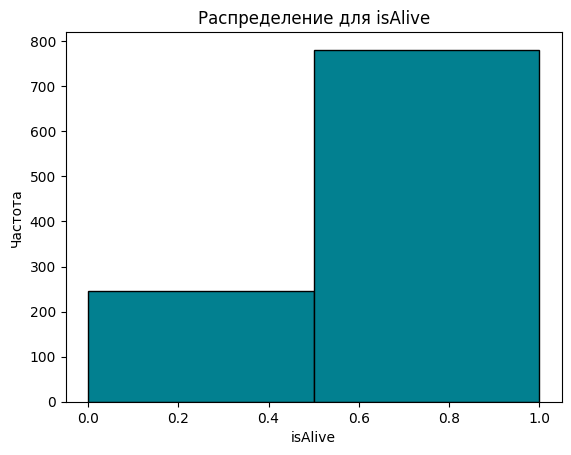

In [116]:
feature_data = data["isAlive"].dropna()
plt.hist(feature_data, bins=2, edgecolor='black',color = '#028090')
plt.title(f'Распределение для isAlive')
plt.xlabel("isAlive")
plt.ylabel('Частота')
plt.show()

Датасет не является сбалансированным, так как количество выживших персонажей намного больше чем мертвых.

In [117]:
data.columns

Index(['title', 'male', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isMarried', 'isNoble', 'age', 'isAlive', 'firstname', 'lastname',
       'isPopular', 'boolDeadRelations', 'general_culture'],
      dtype='object')

Попробуем сделать несколько предположений о зависимости целевой переменной и других признаков. Проверим гипотезы:
1. Чаще выживают женщины
2. Чаще выживают дети и старики
3. Чем больше популярность тем меньше вероятности смерти персонажа

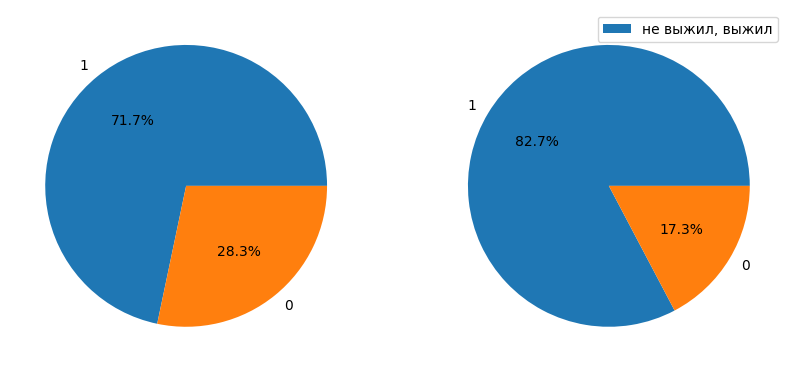

In [123]:
# 1)
# Готовим данные для графика
data1 = data[data['male'] == 1]['isAlive'].value_counts()
data2 = data[data['male'] == 0]['isAlive'].value_counts()

# Строим круговую диаграмму
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

plt.legend(['не выжил, выжил'])

plt.show()

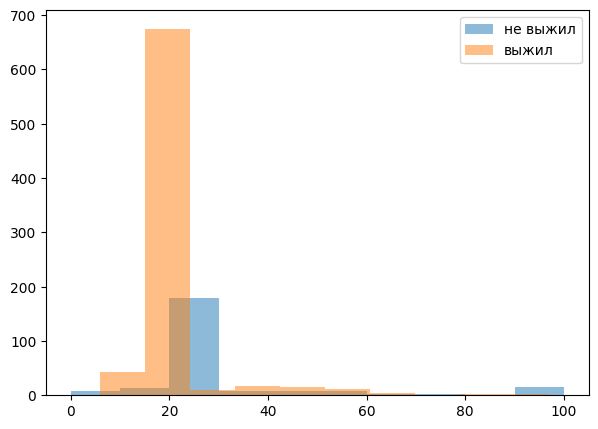

In [124]:
plt.figure(figsize=(7, 5))

plt.hist(data['age'][data['isAlive'] == 0], alpha=0.5, label='не выжил')
plt.hist(data['age'][data['isAlive'] == 1], alpha=0.5, label='выжил')

plt.legend()

plt.show()

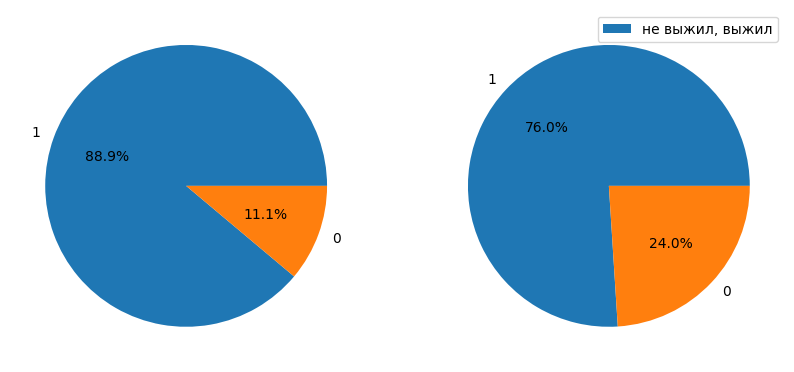

In [125]:
# 1)
# Готовим данные для графика
data1 = data[data['isPopular'] == 1]['isAlive'].value_counts()
data2 = data[data['isPopular'] == 0]['isAlive'].value_counts()

# Строим круговую диаграмму
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

plt.legend(['не выжил, выжил'])

plt.show()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [126]:
data.head()

,title,male,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,firstname,lastname,isPopular,boolDeadRelations,general_culture
S.No,,,,,,,,,,,,,,,,
2,Lord of the Crossing,1,1,1,1,1,1,1,1,97.0,1,Walder,Frey,1,1,Rivermen
3,Ser,1,0,0,0,1,0,0,1,24.0,1,other,Hill,0,0,Northmen
4,Queen,0,0,0,0,0,0,1,1,23.0,0,other,Arryn,0,0,Northmen
5,Greenstone,0,0,0,0,1,0,1,1,29.0,1,other,Santagar,0,0,Dornish
7,Hand of the King,1,0,0,0,0,0,1,1,26.0,0,other,Targaryen,0,0,Valyrian


Категориальные: firstname,general_culture,lastname

In [ ]:
firstname,general_culture,lastname

In [127]:
data.firstname.value_counts()

,count
firstname,
other,659
Jon,11
Jeyne,11
Walder,9
Walda,7
...,...
Jeffory,2
Rupert,2
Samwell,2


In [128]:
data.lastname.value_counts()

,count
lastname,
,258
Frey,83
other,57
Targaryen,30
Tyrell,27
...,...
Connington,2
Lynderly,2
Belmore,2


In [129]:
data.general_culture.value_counts()

,count
general_culture,
Northmen,832
Ironborn,61
Valyrian,26
Dornish,12
Vale mountain clans,12
Reach,11
Rivermen,9
Valemen,9
Ghiscari,6


In [142]:
from sklearn.preprocessing import LabelEncoder

label_encoding = LabelEncoder()

for column in ["firstname","lastname","title","general_culture"]:
  data[column] = label_encoding.fit_transform(data[column])

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

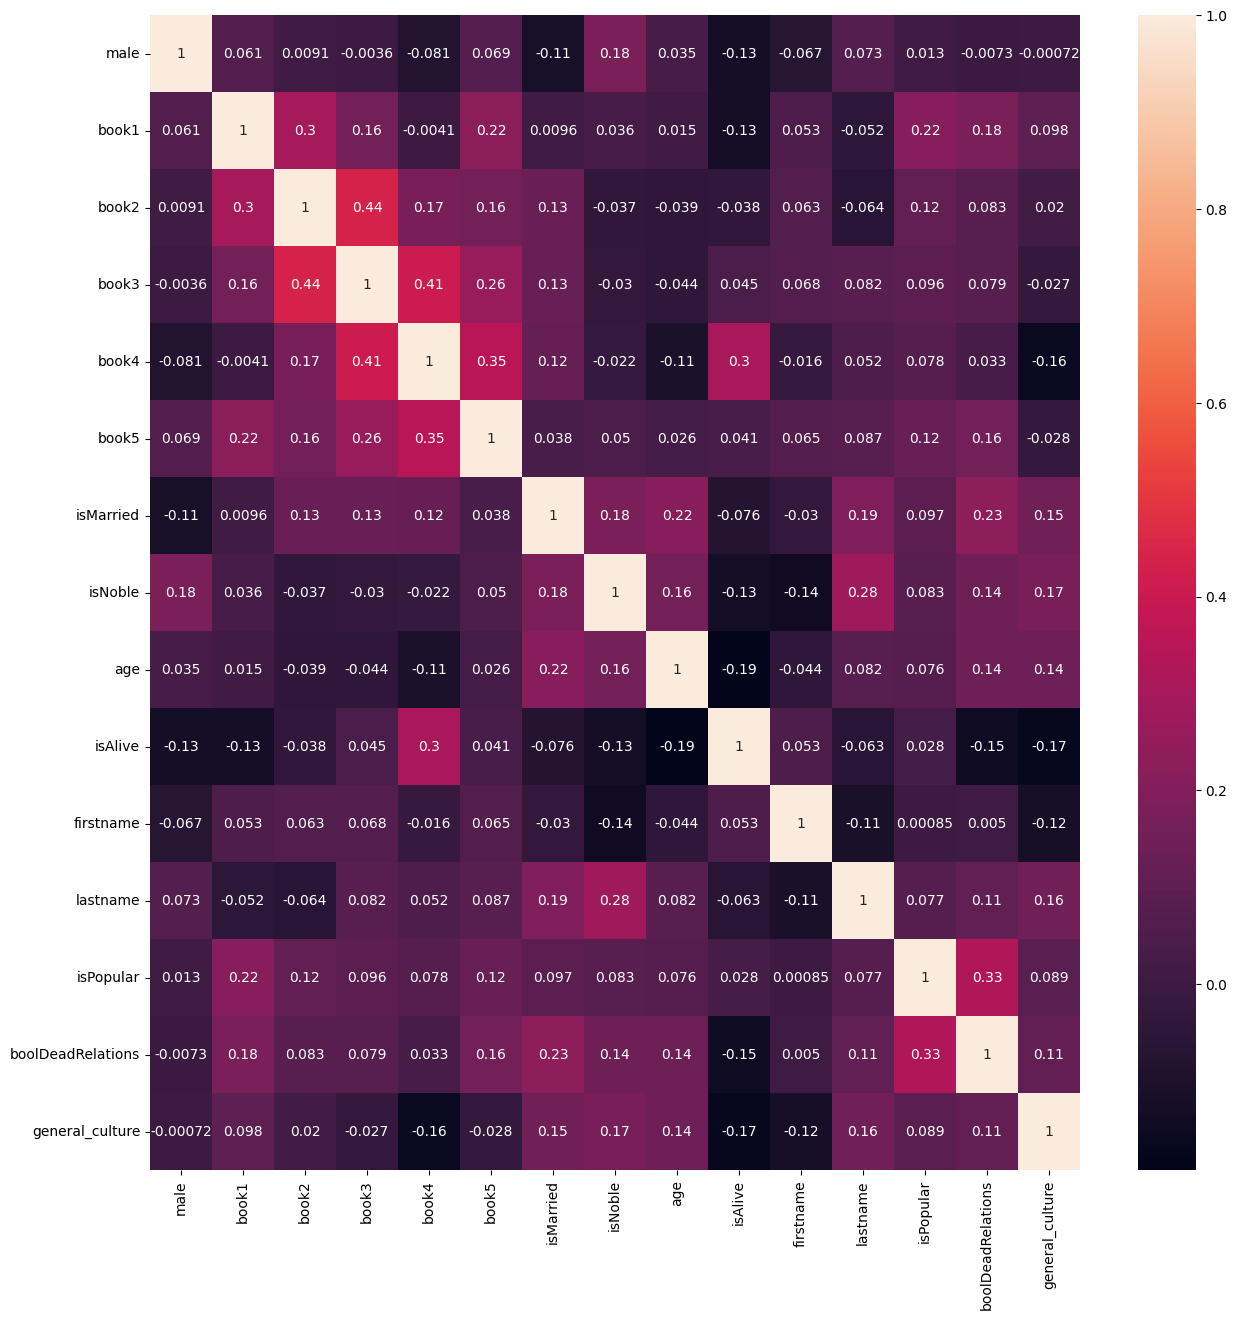

In [135]:
fig = plt.figure(figsize=(15,15))
dataplot = sb.heatmap(data.corr(numeric_only=True), annot=True)
plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [143]:
X = data.drop(columns=['isAlive']).values
y = data['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [146]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [147]:

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1026 entries, 2 to 1557
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1026 non-null   int64  
 1   male               1026 non-null   int64  
 2   book1              1026 non-null   int64  
 3   book2              1026 non-null   int64  
 4   book3              1026 non-null   int64  
 5   book4              1026 non-null   int64  
 6   book5              1026 non-null   int64  
 7   isMarried          1026 non-null   int64  
 8   isNoble            1026 non-null   int64  
 9   age                1026 non-null   float64
 10  isAlive            1026 non-null   int64  
 11  firstname          1026 non-null   int64  
 12  lastname           1026 non-null   int64  
 13  isPopular          1026 non-null   int64  
 14  boolDeadRelations  1026 non-null   int64  
 15  general_culture    1026 non-null   int64  
dtypes: float64(1), int64(15)
memo

In [149]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [150]:
# Шаг 1. создание и обучение модели Logistic Regression
logistic_regression = LogisticRegression(C=1)
logistic_regression.fit(X_train, y_train)
y_pred_logistic = logistic_regression.predict(X_test)

# Шаг 2. создание и обучение модели Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

# Шаг 3. создание и обучение модели AdaBoost
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
y_pred_ada = adaboost.predict(X_test)

# Шаг 4. создание и обучение модели Gaussian Process
gaussian_process = GaussianProcessClassifier()
gaussian_process.fit(X_train, y_train)
y_pred_gp = gaussian_process.predict(X_test)

# Шаг 5. создание и обучение модели Gaussian Naive Bayes
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
y_pred_nb = gaussian_nb.predict(X_test)

# Шаг 6. создание и обучение модели K-Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Шаг 7. создание и обучение модели Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# Шаг 8. создание и обучение модели Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [151]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [152]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7767


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [153]:
from sklearn.metrics import accuracy_score

# Шаг 1. Предсказание и оценка для Logistic Regression
y_pred_logistic = logistic_regression.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy Logistic Regression: %.4f" % accuracy_logistic)

# Шаг 2. Предсказание и оценка для Random Forest
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy Random Forest: %.4f" % accuracy_rf)

# Шаг 3. Предсказание и оценка для AdaBoost
y_pred_ada = adaboost.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("Accuracy AdaBoost: %.4f" % accuracy_ada)

# Шаг 4. Предсказание и оценка для Gaussian Process
y_pred_gp = gaussian_process.predict(X_test)
accuracy_gp = accuracy_score(y_test, y_pred_gp)
print("Accuracy Gaussian Process: %.4f" % accuracy_gp)

# Шаг 5. Предсказание и оценка для Gaussian Naive Bayes
y_pred_nb = gaussian_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy Gaussian Naive Bayes: %.4f" % accuracy_nb)

# Шаг 6. Предсказание и оценка для K-Neighbors
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy K-Neighbors: %.4f" % accuracy_knn)

# Шаг 7. Предсказание и оценка для Support Vector Classifier
y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy Support Vector Classifier: %.4f" % accuracy_svc)

# Шаг 8. Предсказание и оценка для Decision Tree
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy Decision Tree: %.4f" % accuracy_dt)


Accuracy Logistic Regression: 0.7767
Accuracy Random Forest: 0.7476
Accuracy AdaBoost: 0.7621
Accuracy Gaussian Process: 0.7039
Accuracy Gaussian Naive Bayes: 0.7476
Accuracy K-Neighbors: 0.7282
Accuracy Support Vector Classifier: 0.7184
Accuracy Decision Tree: 0.7233


Выберите лучшую модель.

Accuracy Logistic Regression: 0.7767

In [158]:
len(y_pred_logistic)

206

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [159]:
test = pd.read_csv("/content/game_of_thrones_test.csv",index_col="S.No")

In [162]:
test.columns

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity'],
      dtype='object')

In [164]:
import re
# Функция для удаления текста в скобках
def remove_parentheses(text):
    return re.sub(r'\s*\(.*?\)\s*', ' ', text).strip()

# Применяем функцию к столбцу full_name
test['name'] = test['name'].apply(remove_parentheses)
# Функция для разделения имени и фамилии
def split_name(name):
    parts = name.rsplit(' ', 1)  # Разделяем только по последнему пробелу
    if len(parts) == 2:
        first_part = parts[0]   # Все, что до последнего пробела
        last_part = parts[1]     # Все, что после последнего пробела
    else:
        first_part = name        # Если пробелов нет, сохраняем целиком
        last_part = ""

    return pd.Series([first_part, last_part])

# Применяем функцию к столбцу full_name
test[['firstname', 'lastname']] = test['name'].apply(split_name)

In [165]:
firstname_counts = test["firstname"].value_counts()
lastname_counts = test["lastname"].value_counts()

In [166]:
mask = test["firstname"].isin(firstname_counts[firstname_counts > 1].index)

# Заменяем значения, которые не удовлетворяют маске, на 'other'
test["firstname"] = test["firstname"].where(mask, "other")
mask = test["lastname"].isin(lastname_counts[lastname_counts > 1].index)

# Заменяем значения, которые не удовлетворяют маске, на 'other'
test["lastname"] = test["lastname"].where(mask, "other")

In [167]:
test['general_culture'] = test['culture'].map(get_general_culture)

In [168]:
test["isPopular"] = test['popularity'].apply(lambda x: 1 if x >= 0.5 else 0)
test["boolDeadRelations"] = test['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)

In [169]:
test.drop(columns=['mother', 'father',"culture",'heir','dateOfBirth', 'house', 'spouse','isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse','numDeadRelations','popularity','name'], inplace = True)

In [172]:

label_encoding = LabelEncoder()

for column in ["firstname","lastname","title","general_culture"]:
  test[column] = label_encoding.fit_transform(test[column])

In [176]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              389 non-null    int64  
 1   male               389 non-null    int64  
 2   book1              389 non-null    int64  
 3   book2              389 non-null    int64  
 4   book3              389 non-null    int64  
 5   book4              389 non-null    int64  
 6   book5              389 non-null    int64  
 7   isMarried          389 non-null    int64  
 8   isNoble            389 non-null    int64  
 9   age                389 non-null    float64
 10  firstname          389 non-null    int64  
 11  lastname           389 non-null    int64  
 12  general_culture    389 non-null    int64  
 13  isPopular          389 non-null    int64  
 14  boolDeadRelations  389 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 48.6 KB


In [175]:
median_age = test["age"].dropna().median()
test["age"].fillna(int(median_age), inplace=True)

<ipython-input-175-a7d57db58f23>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test["age"].fillna(int(median_age), inplace=True)


In [186]:
y_pred_logistic_test = logistic_regression.predict(test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [187]:
y_pred_logistic_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [154]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 10.4MB/s]


In [190]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [200]:
output = pd.DataFrame({'S.No': test.index, 'isAlive': y_pred_logistic_test})
output.to_csv('new_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Как сохранить измененный Pandas DataFrame в csv файл:

In [199]:
submission.to_csv("/content/new_submission.csv", index=False)